In [1]:
!pip install auto-sklearn
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 86.7 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
import pandas as pd

# Define column names (based on `wdbc.names` structure)
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]  # 30 Features

# Load dataset
file_path = "/kaggle/input/d/iamtheoneaj/breast-cancer-wisconsin-diagnostic/wdbc.data"
df = pd.read_csv(file_path, header=None, names=columns)


In [19]:
import pandas as pd

# Define column names (based on `wdbc.names` structure)
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]  # 30 Features

# Load dataset
file_path = "/kaggle/input/d/iamtheoneaj/breast-cancer-wisconsin-diagnostic/wdbc.data"
df = pd.read_csv(file_path, header=None, names=columns)

# Check dataset info
print(df.head())  
print(df.info())

# Step 1: Preprocessing
# Encode the diagnosis column (M = Malignant, B = Benign)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})  # 1 for Malignant, 0 for Benign

# Split features and target
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']

# Step 2: Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the processed data
print(X_scaled[:5])  # Show first 5 rows of scaled data


         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

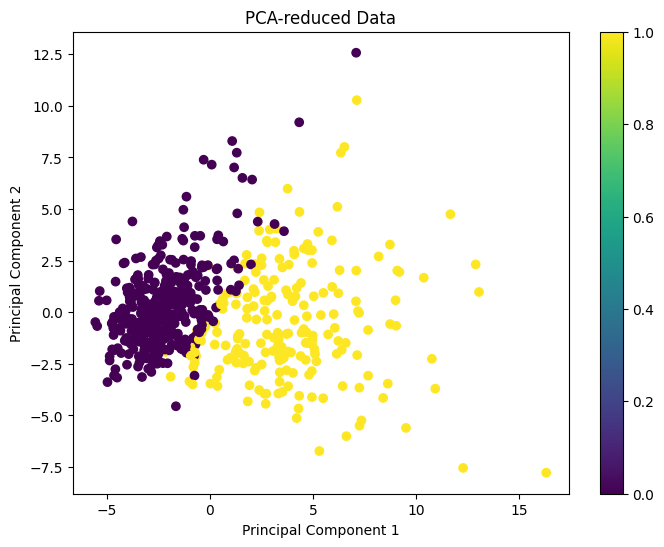

Explained Variance Ratio: [0.44272026 0.18971182]


In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA (reduce to 2 components for easy visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Show the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


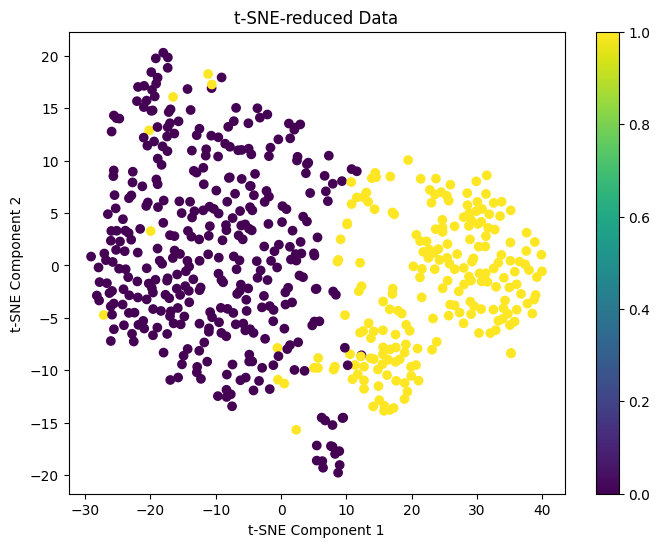

In [21]:
from sklearn.manifold import TSNE

# Apply t-SNE (for visualization purposes)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE-reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [22]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Apply AutoML using TPOT
# TPOTClassifier will automatically select the best model and tune hyperparameters
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = tpot.predict(X_test)

# Print the performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Export the best model
tpot.export('best_model.py')


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9428571428571428

Generation 2 - Current best internal CV score: 0.9428571428571428

Generation 3 - Current best internal CV score: 0.9428571428571428

Generation 4 - Current best internal CV score: 0.9428571428571428

Generation 5 - Current best internal CV score: 0.9428571428571428

Best pipeline: LinearSVC(input_matrix, C=10.0, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05)
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
 [[71  0]
 [ 1 42]]


In [23]:
# Evaluate the model (classification report, confusion matrix)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
 [[71  0]
 [ 1 42]]


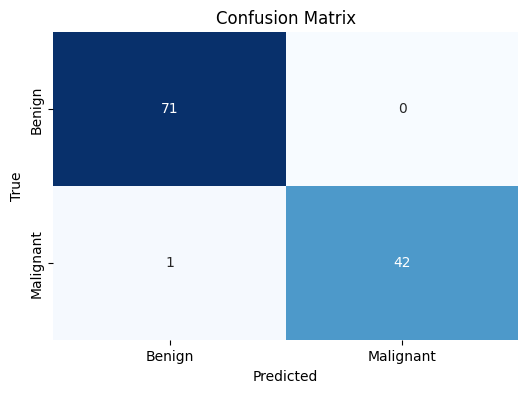

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
